In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
!nvidia-smi

Wed Jul 14 11:18:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA Tesla M60    On   | 00000000:04:00.0 Off |                    0 |
| N/A   29C    P8    15W / 150W |      0MiB /  7618MiB |      0%   E. Process |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## load data

In [2]:
galstar = pd.read_csv("data_and_information/galstar.csv")
galstar = galstar.iloc[:,1:]
galstar_labels = galstar['y']
galstar_images = galstar.iloc[:,1:]

In [3]:
galstar_images

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 5400,Unnamed: 5401,Unnamed: 5402,Unnamed: 5403,Unnamed: 5404,Unnamed: 5405,Unnamed: 5406,Unnamed: 5407,Unnamed: 5408,Unnamed: 5409
0,0.005208,0.005283,0.005284,0.005249,0.005268,0.005311,0.005342,0.005191,0.005247,0.005321,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
1,0.005264,0.005220,0.005248,0.005340,0.005237,0.005248,0.005251,0.005168,0.005227,0.005344,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
2,0.005314,0.005302,0.005279,0.005258,0.005294,0.005229,0.005281,0.005198,0.005292,0.005332,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
3,0.005190,0.005255,0.005213,0.005263,0.005296,0.005288,0.005243,0.005332,0.005282,0.005212,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
4,0.005163,0.005178,0.005284,0.005220,0.005249,0.005287,0.005210,0.005289,0.005191,0.005239,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31793,0.005299,0.005320,0.005284,0.005161,0.005311,0.005254,0.005347,0.005219,0.005253,0.005299,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
31794,0.005254,0.005231,0.005184,0.005195,0.005266,0.005277,0.005281,0.005260,0.005268,0.005181,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
31795,0.005348,0.005299,0.005289,0.005273,0.005278,0.005297,0.005321,0.005338,0.005301,0.005268,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
31796,0.005380,0.005356,0.005259,0.005239,0.005345,0.005306,0.005325,0.005305,0.005281,0.005350,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257


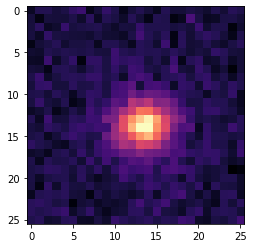

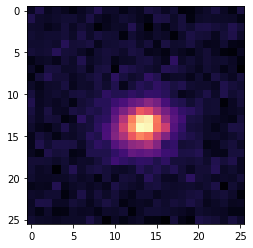

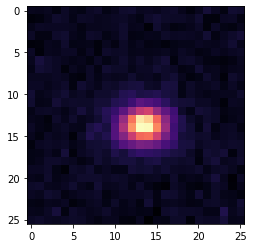

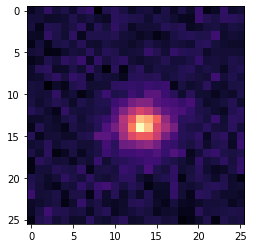

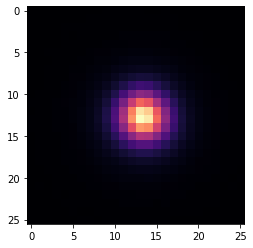

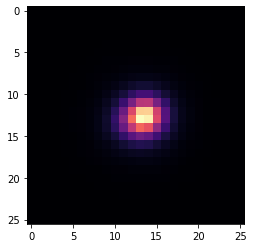

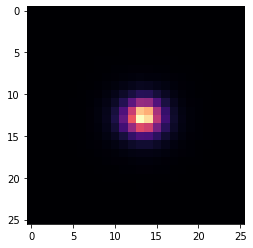

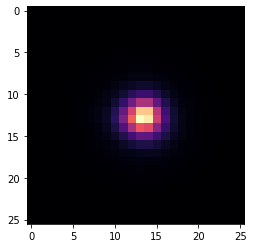

In [4]:
data = galstar_images.values
labels = galstar_labels.values

    
data_pre = data.reshape(31798,8,26,26)  #griz (psf-g, psf-r,psf-i,psf-z) 8 channels,they claim up to mag27 in the i band


for i in range(8):
    plt.imshow(data_pre[0,i,:,:],cmap='magma')
    plt.show()

## r , i band only

r , i band has the highest CCD QE (90% range), so it should give us the highest SNR

![image info](https://www.asahi-spectra.com/opticalfilters/img/fgr_ugrizband.jpg)

QE:data

https://www.subarutelescope.org/Observing/Instruments/HSC/ccd.html

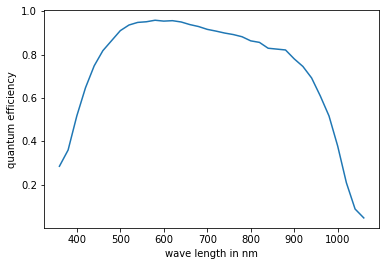

In [5]:
qe = np.array([[0.285,  0.360,0.517,0.647,0.748,0.818,0.864,0.910,
0.936,0.948,0.951,0.958,0.954,0.956,0.950,0.938,0.929,0.916,0.908,
0.899,0.892,0.882,0.863,0.856,0.829,0.825,0.821,0.780,0.745,0.692,0.609,0.517,0.378,0.209,0.088,0.047]])
qe = qe.reshape(-1,)
wave_length = np.linspace(360,1060,36)


plt.ylabel('quantum efficiency')
plt.xlabel('wave length in nm')
plt.plot(wave_length,qe)


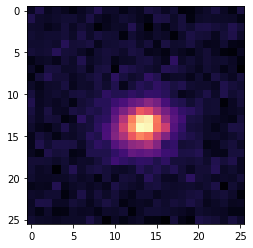

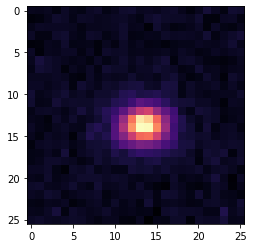

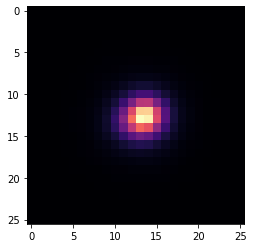

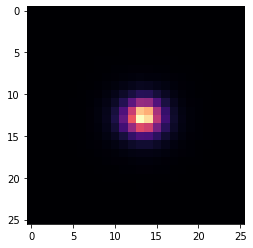

In [6]:
ri_band = data_pre[:,1:3,:,:]
ri_psf = data_pre[:,5:7,:,:]

ri_data = np.concatenate((ri_band,ri_psf),axis=1)

for i in range(4):
    plt.imshow(ri_data[0,i,:,:],cmap='magma')
    plt.show()


## normalize image

In [7]:
vec_one_ = np.ones((26,26))

for i in tqdm(range(31798)):
    for j in range(4):
        
        
        ri_data[i,j,:,:] = ri_data[i,j,:,:]- np.amin(ri_data[i,j,:,:])*vec_one_  #background subtract
        ri_data[i,j,:,:] = ri_data[i,j,:,:] / np.max(ri_data[i,j,:,:])  #normalize between 0 and 1
        
        assert np.max(ri_data[i,j,:,:]) ==1 and np.min(ri_data[i,j,:,:]) ==0,'check normalization'


100%|██████████| 31798/31798 [00:11<00:00, 2719.01it/s]


In [8]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
import torchvision as tv
from torch.utils.data import DataLoader,TensorDataset
from torch import Tensor

if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

device = torch.device(device)
print(device)

cuda:0


## shuffle, transform to tensor

In [9]:
dataset = ri_data
train_label = labels.reshape(-1,1)



data_tensor = TensorDataset(Tensor(dataset),Tensor(train_label))

In [12]:
from torch.utils.data.sampler import SubsetRandomSampler

dataset_size = len(dataset)

indices = list(range(dataset_size))
val_split = 0.01
split = int(np.floor(val_split*dataset_size))





if True:
    np.random.seed(42)
    np.random.shuffle(indices)
train_indices,val_indices = indices[split:],indices[:split]   




train_indices,val_indices = indices[split:],indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset = data_tensor,batch_size = 15899,sampler = train_sampler)
val_loader = torch.utils.data.DataLoader(dataset = data_tensor,batch_size = 317,sampler = val_sampler)

In [13]:
print(len(train_sampler))
print(len(val_sampler))

31481
317


In [14]:
'''
dataiter = iter(train_loader)
img,label = dataiter.next()

train_sampler.shape

'''

'\ndataiter = iter(train_loader)\nimg,label = dataiter.next()\n\ntrain_sampler.shape\n\n'

## Model

In [18]:
class BobNet(nn.Module):
    def __init__(self):
        super().__init__()        
        
        self.conv1 = nn.Conv2d(4,16,3,stride = 1,padding=0)#16,24x24 ()
        self.conv2 = nn.Conv2d(16,32,3,stride =1,padding = 0) #22x22,32#  batchnorm
        self.fc1 = nn.Linear(22*22*32,100)
        self.fc2 = nn.Linear(100,20) 
        self.fc3 = nn.Linear(20,1)
        
    def forward(self,x):
        x = torch.nn.functional.relu(self.conv1(x)) #leaky relu, elu
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.flatten(x,1)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x =  torch.sigmoid(self.fc3(x)) #binary, 0,1
        
        return x
model = BobNet().to(device)

In [19]:
from sklearn.metrics import accuracy_score
def eval(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred>0.5)
    return accuracy    

## train

In [20]:
criterion = nn.BCELoss() 


optimizer = torch.optim.Adam(model.parameters(),lr = 0.0004,weight_decay = 1e-5)

num_epochs = 800
output2 = []
Acc = []
Val=[]

for val_img,val_lab in val_loader:
    val_img,val_lab = val_img.to(device),val_lab.to(device)



for epoch in range(num_epochs):
    for img,lab in train_loader:
     
        
        img = img.to(device)
        lab= lab.to(device)
        
        out = model(img)
        
        val_out = model(val_img)
        valacc = eval(val_lab.cpu(),val_out.cpu())
        Val.append(valacc)
        acc = eval(lab.cpu(),out.cpu())
        

        Acc.append(acc)
        
        loss = criterion(out,lab)
        
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #if epoch % 40 ==0:
  
    print(f'Epoch:{epoch+1},train-acc: {acc*100:.5f}%,val-acc: {valacc*100:.5f}%')        
    
    
    output2.append(loss.item())

Epoch:1,train-acc: 58.83070%,val-acc: 63.40694%
Epoch:2,train-acc: 59.08741%,val-acc: 63.40694%
Epoch:3,train-acc: 58.90771%,val-acc: 63.40694%
Epoch:4,train-acc: 68.23899%,val-acc: 71.29338%
Epoch:5,train-acc: 82.21666%,val-acc: 83.91167%
Epoch:6,train-acc: 86.34963%,val-acc: 86.11987%
Epoch:7,train-acc: 88.11449%,val-acc: 87.69716%
Epoch:8,train-acc: 89.35310%,val-acc: 88.95899%
Epoch:9,train-acc: 90.54678%,val-acc: 89.90536%
Epoch:10,train-acc: 90.41843%,val-acc: 90.85174%
Epoch:11,train-acc: 90.48903%,val-acc: 90.22082%
Epoch:12,train-acc: 90.59171%,val-acc: 88.64353%
Epoch:13,train-acc: 90.14247%,val-acc: 87.06625%
Epoch:14,train-acc: 90.03337%,val-acc: 87.38170%
Epoch:15,train-acc: 89.93069%,val-acc: 87.69716%
Epoch:16,train-acc: 89.98845%,val-acc: 88.01262%
Epoch:17,train-acc: 90.45052%,val-acc: 88.32808%
Epoch:18,train-acc: 90.73931%,val-acc: 88.95899%
Epoch:19,train-acc: 91.49018%,val-acc: 89.58991%
Epoch:20,train-acc: 92.17045%,val-acc: 90.53628%
Epoch:21,train-acc: 92.99191%

Epoch:168,train-acc: 97.58696%,val-acc: 97.47634%
Epoch:169,train-acc: 97.52278%,val-acc: 97.47634%
Epoch:170,train-acc: 97.58054%,val-acc: 98.10726%
Epoch:171,train-acc: 97.58696%,val-acc: 97.47634%
Epoch:172,train-acc: 97.70248%,val-acc: 97.47634%
Epoch:173,train-acc: 97.86934%,val-acc: 97.79180%
Epoch:174,train-acc: 97.70889%,val-acc: 97.47634%
Epoch:175,train-acc: 97.58054%,val-acc: 97.47634%
Epoch:176,train-acc: 97.61263%,val-acc: 97.47634%
Epoch:177,train-acc: 97.72815%,val-acc: 97.47634%
Epoch:178,train-acc: 97.78591%,val-acc: 97.47634%
Epoch:179,train-acc: 97.72173%,val-acc: 97.47634%
Epoch:180,train-acc: 97.65114%,val-acc: 97.79180%
Epoch:181,train-acc: 97.74740%,val-acc: 97.47634%
Epoch:182,train-acc: 97.71531%,val-acc: 97.47634%
Epoch:183,train-acc: 97.77307%,val-acc: 97.47634%
Epoch:184,train-acc: 97.70889%,val-acc: 97.47634%
Epoch:185,train-acc: 97.80516%,val-acc: 97.47634%
Epoch:186,train-acc: 97.64472%,val-acc: 97.47634%
Epoch:187,train-acc: 97.79874%,val-acc: 97.47634%


Epoch:332,train-acc: 97.88217%,val-acc: 97.47634%
Epoch:333,train-acc: 97.79232%,val-acc: 96.84543%
Epoch:334,train-acc: 98.08112%,val-acc: 97.79180%
Epoch:335,train-acc: 98.19664%,val-acc: 97.79180%
Epoch:336,train-acc: 98.18380%,val-acc: 97.79180%
Epoch:337,train-acc: 98.24798%,val-acc: 97.79180%
Epoch:338,train-acc: 98.02978%,val-acc: 97.79180%
Epoch:339,train-acc: 98.40200%,val-acc: 97.47634%
Epoch:340,train-acc: 98.22231%,val-acc: 98.10726%
Epoch:341,train-acc: 98.28648%,val-acc: 98.10726%
Epoch:342,train-acc: 98.24156%,val-acc: 97.79180%
Epoch:343,train-acc: 98.24798%,val-acc: 98.10726%
Epoch:344,train-acc: 98.27365%,val-acc: 97.79180%
Epoch:345,train-acc: 98.17738%,val-acc: 98.10726%
Epoch:346,train-acc: 98.13246%,val-acc: 97.79180%
Epoch:347,train-acc: 98.19664%,val-acc: 98.10726%
Epoch:348,train-acc: 98.15813%,val-acc: 98.10726%
Epoch:349,train-acc: 98.24798%,val-acc: 98.10726%
Epoch:350,train-acc: 98.02978%,val-acc: 98.10726%
Epoch:351,train-acc: 98.22231%,val-acc: 97.79180%


Epoch:496,train-acc: 98.39558%,val-acc: 97.79180%
Epoch:497,train-acc: 98.44051%,val-acc: 97.79180%
Epoch:498,train-acc: 98.41484%,val-acc: 98.73817%
Epoch:499,train-acc: 98.52394%,val-acc: 97.79180%
Epoch:500,train-acc: 98.55603%,val-acc: 97.79180%
Epoch:501,train-acc: 98.43409%,val-acc: 98.10726%
Epoch:502,train-acc: 98.45976%,val-acc: 97.79180%
Epoch:503,train-acc: 98.56886%,val-acc: 98.10726%
Epoch:504,train-acc: 98.51110%,val-acc: 97.79180%
Epoch:505,train-acc: 98.49185%,val-acc: 98.73817%
Epoch:506,train-acc: 98.52394%,val-acc: 97.79180%
Epoch:507,train-acc: 98.56244%,val-acc: 97.79180%
Epoch:508,train-acc: 98.64587%,val-acc: 98.73817%
Epoch:509,train-acc: 98.56244%,val-acc: 97.79180%
Epoch:510,train-acc: 98.56886%,val-acc: 98.10726%
Epoch:511,train-acc: 98.57528%,val-acc: 98.10726%
Epoch:512,train-acc: 98.49827%,val-acc: 97.79180%
Epoch:513,train-acc: 98.54319%,val-acc: 98.73817%
Epoch:514,train-acc: 98.55603%,val-acc: 97.79180%
Epoch:515,train-acc: 98.33783%,val-acc: 97.79180%


Epoch:660,train-acc: 98.46618%,val-acc: 97.79180%
Epoch:661,train-acc: 98.19664%,val-acc: 97.79180%
Epoch:662,train-acc: 98.56244%,val-acc: 98.10726%
Epoch:663,train-acc: 98.61379%,val-acc: 98.10726%
Epoch:664,train-acc: 98.60737%,val-acc: 98.42271%
Epoch:665,train-acc: 98.62020%,val-acc: 98.10726%
Epoch:666,train-acc: 98.69721%,val-acc: 98.10726%
Epoch:667,train-acc: 98.63304%,val-acc: 98.10726%
Epoch:668,train-acc: 98.60737%,val-acc: 98.10726%
Epoch:669,train-acc: 98.60095%,val-acc: 97.79180%
Epoch:670,train-acc: 98.67796%,val-acc: 98.10726%
Epoch:671,train-acc: 98.66513%,val-acc: 98.10726%
Epoch:672,train-acc: 98.51752%,val-acc: 97.79180%
Epoch:673,train-acc: 98.55603%,val-acc: 98.10726%
Epoch:674,train-acc: 98.70363%,val-acc: 98.10726%
Epoch:675,train-acc: 98.61379%,val-acc: 98.42271%
Epoch:676,train-acc: 98.60095%,val-acc: 98.10726%
Epoch:677,train-acc: 98.62020%,val-acc: 98.10726%
Epoch:678,train-acc: 98.58170%,val-acc: 98.42271%
Epoch:679,train-acc: 98.76139%,val-acc: 98.42271%


In [21]:
print('best validation accuracy:',np.amax(Val))
print('best training accuracy:',np.amax(Acc))

best validation accuracy: 0.9873817034700315
best training accuracy: 0.9894961947292282


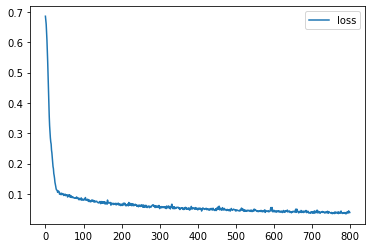

In [22]:
plt.plot(output2,label='loss')
plt.legend()

plt.show()

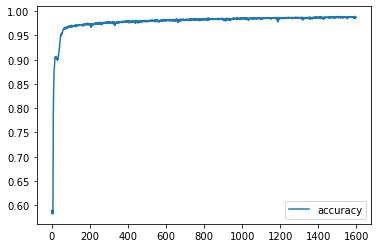

In [23]:
plt.plot(Acc,label = 'accuracy')
plt.legend()

In [24]:
y_prediction = out.detach().cpu().numpy()
np_y_pred = np.where(y_prediction < 0.5,0,1)
np_y_true = lab.cpu().numpy()

## F1 score

In [25]:
from sklearn.metrics import f1_score
f1_score(np_y_true,np_y_pred)

0.9847227607599844

## confusion matrix

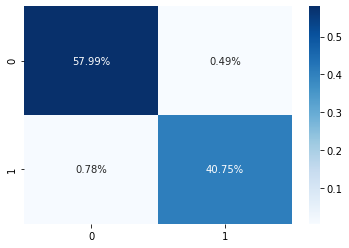

In [26]:

from sklearn.metrics import confusion_matrix
CFM = confusion_matrix(np_y_true,np_y_pred)

import seaborn as sns
sns.heatmap(CFM/np.sum(CFM),annot=True,fmt='.2%',cmap = 'Blues')

## AUC ,ROC

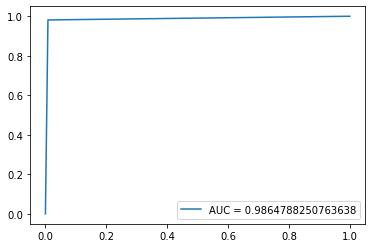

In [27]:
from sklearn.metrics import roc_auc_score,roc_curve

auc =roc_auc_score(np_y_true,np_y_pred)

fpr,tpr,__ = roc_curve(np_y_true,np_y_pred)
plt.plot(fpr,tpr,label = 'AUC = '+str(auc))
plt.legend(loc=4)
plt.show()